In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, make_scorer


from scipy.interpolate import interp1d
from sklearn.pipeline import Pipeline
from functools import partial



pd.options.display.max_rows = None  # Show all rows
pd.options.display.max_columns = None  # Show all columns
pd.options.display.max_colwidth = None  # Ensure full content is visible
pd.set_option('display.float_format', '{:.6f}'.format)  # Adjust decimal places as needed

In [66]:
cdc2023 = pd.read_csv(r"data_files\CDC_2023.csv")

In [67]:
new_list = [
    "SEXVAR", "PVTRESD3", "SDHBILLS", "SDHUTILS", 
    "SDHSTRE1", "_IMPRACE", "GENHLTH", "PHYSHLTH", "MENTHLTH", "PRIMINS1", "MEDCOST1", 
    "EXERANY2", "EXRACT12", "BPHIGH6", "BPMEDS1", "CHOLCHK3", "TOLDHI3",
    "CHOLMED3", "CVDINFR4", "CVDCRHD4", "CVDSTRK3", "ASTHMA3", "ASTHNOW",
    "CHCCOPD3", "CHCSCNC1", "CHCKDNY2", "HAVARTH4", "DIABETE4", "DIABAGE4",
    "MARITAL", "EDUCA", "CHILDREN", "INCOME3", "PREGNANT", "WEIGHT2",
    "HEIGHT3", "DECIDE", "DEAF", "SMOKE100", "SMOKDAY2", "USENOW3", "CHECKUP1",
    "ECIGNOW2", "ALCDAY4", "AVEDRNK3", "DRNK3GE5", "HIVTST7", "PDIABTS1",
    "PREDIAB2", "DIABTYPE", "INSULIN1", "CHKHEMO3", "EYEEXAM1", "DIABEYE1",
    "FEETSORE", "SDLONELY", "_BMI5CAT", "_AGEG5YR", "EXEROFT1" , "EXERHMM1", 
    "EXRACT22", "EXEROFT2", "EXERHMM2", "STRENGTH", "EMPLOY1", "BLIND", "FALL12MN",
    "MAXDRNKS", "COVIDPO1","SDHEMPLY", "FOODSTMP", "SDHEMPLY", "FOODSTMP", "SDHFOOD1",
]

In [68]:
len(new_list)

74

In [69]:
cdc2023 = cdc2023[new_list]

In [73]:
len(cdc2023.columns)

74

In [59]:
cdc2023.sample(5)

,SEXVAR,PVTRESD3,SDHBILLS,SDHUTILS,SDHSTRE1,_IMPRACE,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINS1,MEDCOST1,EXERANY2,EXRACT12,BPHIGH6,BPMEDS1,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCCOPD3,CHCSCNC1,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DECIDE,DEAF,SMOKE100,SMOKDAY2,USENOW3,CHECKUP1,ECIGNOW2,ALCDAY4,AVEDRNK3,DRNK3GE5,HIVTST7,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,FEETSORE,SDLONELY,_BMI5CAT,_AGEG5YR,EXEROFT1,EXERHMM1,EXRACT22,EXEROFT2,EXERHMM2,STRENGTH,EMPLOY1,BLIND,FALL12MN,MAXDRNKS,COVIDPO1,SDHEMPLY,SDHEMPLY,FOODSTMP,FOODSTMP,SDHEMPLY,SDHEMPLY,FOODSTMP,FOODSTMP,SDHFOOD1
232974,1.000000,1.000000,NaN,NaN,NaN,2.000000,4.000000,5.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,NaN,5.000000,3.000000,88.000000,4.000000,NaN,200.000000,510.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,205.000000,3.000000,5.000000,2.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,9.000000,102.000000,30.000000,4.000000,103.000000,25.000000,888.000000,1.000000,2.000000,88.000000,5.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346154,1.000000,1.000000,NaN,NaN,NaN,1.000000,4.000000,2.000000,88.000000,7.000000,2.000000,1.000000,11.000000,3.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,2.000000,2.000000,2.000000,1.000000,3.000000,NaN,1.000000,6.000000,88.000000,8.000000,NaN,220.000000,510.000000,2.000000,2.000000,2.000000,NaN,3.000000,1.000000,1.000000,210.000000,2.000000,88.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,9.000000,102.000000,500.000000,1.000000,202.000000,130.000000,888.000000,7.000000,2.000000,88.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357413,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,88.000000,30.000000,1.000000,2.000000,1.000000,2.000000,3.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,2.000000,2.000000,2.000000,2.000000,3.000000,NaN,1.000000,4.000000,4.000000,7.000000,NaN,135.000000,508.000000,1.000000,2.000000,2.000000,NaN,3.000000,1.000000,1.000000,202.000000,6.000000,2.000000,2.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,2.000000,4.000000,212.000000,20.000000,9.000000,101.000000,40.000000,101.000000,1.000000,2.000000,NaN,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000
122828,1.000000,1.000000,NaN,NaN,NaN,1.000000,3.000000,88.000000,88.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,2.000000,2.000000,2.000000,2.000000,3.000000,NaN,2.000000,4.000000,88.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,777.000000,100.000000,88.000000,NaN,NaN,888.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18014,2.000000,1.000000,2.000000,2.000000,4.000000,5.000000,3.000000,88.000000,88.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,2.000000,2.000000,2.000000,2.000000,1.000000,59.000000,2.000000,5.000000,88.000000,6.000000,NaN,145.000000,502.000000,2.000000,2.000000,2.000000,NaN,3.000000,1.000000,4.000000,888.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,9.000000,103.000000,30.000000,88.000000,NaN,NaN,103.000000,2.000000,1.000000,2.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000


In [71]:
df_duplicates = cdc2023.duplicated()
print("Duplicate rows in data:")
print(df_duplicates.value_counts())

Duplicate rows in data:
False    433075
True        248
Name: count, dtype: int64


In [72]:
cdc2023.drop_duplicates(inplace=True)

print('Duplicates on data removed. Number of rows remaining:', cdc2023.shape[0])

Duplicates on data removed. Number of rows remaining: 433075


In [44]:
# # Function to obtain percentages of missing values
def percent_missing(df):
    nan_percent = 100 * df.isnull().sum() / len(df)
    nan_percent = nan_percent[nan_percent > 0].sort_values()

    return nan_percent

# Function to plot out missing value percentages by column
def show_percent_missing(df):
    nan_percent = percent_missing(df)

    plt.figure(figsize=(12, 12))
    sns.barplot(x=nan_percent.index, y=nan_percent)
    plt.xticks(rotation=90)
    plt.ylabel('Missing Percentage %')
    plt.xlabel('Variables')


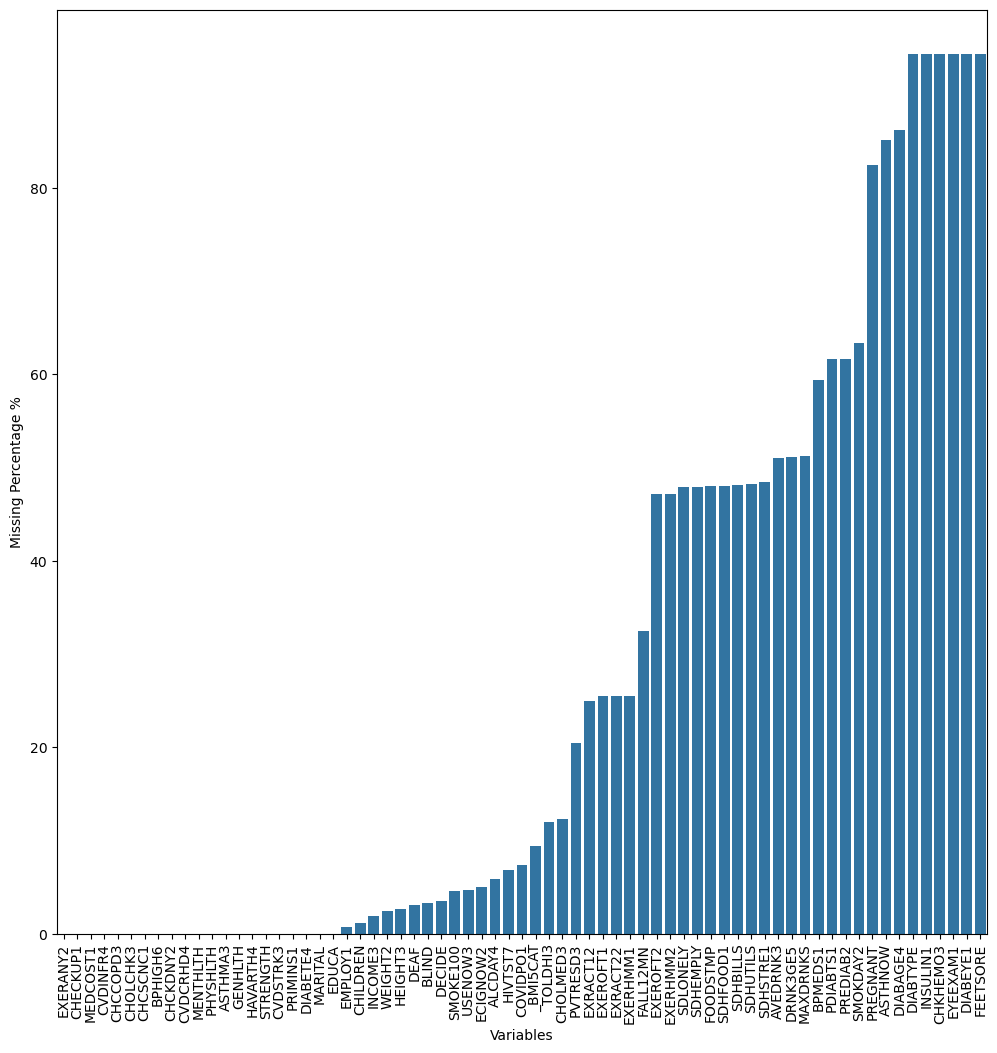

In [45]:
show_percent_missing(cdc2023)

In [74]:
nan_percent = 100 * cdc2023.isnull().sum() / len(cdc2023)
nan_percent = nan_percent[nan_percent > 0].sort_values(ascending=False)

nan_percent[nan_percent > 90]

FEETSORE   94.403279
DIABEYE1   94.401893
EYEEXAM1   94.399815
CHKHEMO3   94.398199
INSULIN1   94.396352
DIABTYPE   94.394735
dtype: float64

In [75]:
# These columns are dropped as they have over 90% missing values or are not relevant for the project topic or extremely high correlation with other relevant variables.

columns_to_drop = ["FEETSORE", "EYEEXAM1", "DIABEYE1", "CHKHEMO3", "INSULIN1", "DIABTYPE"]

# Dropping Specified Columns
cdc2023.drop(columns=columns_to_drop, axis=1, inplace=True)

In [76]:
len(cdc2023.columns)

68

In [77]:
cdc2023.columns

Index(['SEXVAR', 'PVTRESD3', 'SDHBILLS', 'SDHUTILS', 'SDHSTRE1', '_IMPRACE',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINS1', 'MEDCOST1', 'EXERANY2',
       'EXRACT12', 'BPHIGH6', 'BPMEDS1', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3',
       'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCCOPD3',
       'CHCSCNC1', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL',
       'EDUCA', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3',
       'DECIDE', 'DEAF', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'CHECKUP1',
       'ECIGNOW2', 'ALCDAY4', 'AVEDRNK3', 'DRNK3GE5', 'HIVTST7', 'PDIABTS1',
       'PREDIAB2', 'SDLONELY', '_BMI5CAT', '_AGEG5YR', 'EXEROFT1', 'EXERHMM1',
       'EXRACT22', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'EMPLOY1', 'BLIND',
       'FALL12MN', 'MAXDRNKS', 'COVIDPO1', 'SDHEMPLY', 'FOODSTMP', 'SDHEMPLY',
       'FOODSTMP', 'SDHFOOD1'],
      dtype='object')

In [ ]:
new_columns= [
       '_SEX', 'PVTRESD3', 'SDHBILLS', 'SDHUTILS', 'SDHSTRE1', '_IMPRACE',
       '_RFHLTH', '_PHYS14D', '_MENT14D'
        '_HLTHPL1', '_TOTINDA', 'MAXVO21_', '_PACAT3', '_PAINDX3', '_PA150R4', 
        '_PA300R4', '_PA30023', '_PASTRNG', '_PAREC3', '_PASTAE3', '_RFHYPE6',
        'MEDCOST1', '_RFHYPE6', 'BPMEDS1',
        '_CHOLCH3',
          'TOLDHI3', 'CHOLMED3',
       'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCCOPD3',
       'CHCSCNC1', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL',
       'EDUCA', 'CHILDREN', 'INCOME3', 'PREGNANT']

#'_SEX': no missing values
#'PVTRESD3':  private residence,  1(Yes, 88333), 2(no, 12), blank(344,978)
# SDHBILLS: Were you not able to pay your bills?  1 (yes, 20,034), 2 (no, 203,790), 7(don't know/not sure, 528), 9(refused, 509), blank (not asked or missing, 208,462)
#'SDHUTILS': Were you not able to pay utility bills or threatened to lose service? 1 (yes, 13,605), 2 (no, 210,190), 7(don't know/not sure, 426), 9(refused, 403), blank (not asked or missing, 208,669)
#'SDHSTRE1': How often have you felt this kind of stress? 1, 2, 3, 4, 5(never), 7(don't know/not sure), 9(refused), BLANK(nor asked or missing)
#'_IMPRACE': no missing values
#'_RFHLTH', '_PHYS14D', '_MENT14D': no missing values
# '_HLTHPL1', '_TOTINDA', 'MAXVO21_', '_PACAT3', '_PAINDX3', '_PA150R4': no missing values
# '_PA300R4', '_PA30023', '_PASTRNG', '_PAREC3', '_PASTAE3', '_RFHYPE6': no missing values
# 'MEDCOST1': Could Not Aff ord To See Doctor. 1 (yes, 37,198), 2 (no, 394,587), 7(don't know/not sure, 1,174), 9(refused, 362), blank (not asked or missing, 2)
#'_RFHYPE6': told high blood pressure, no missing values
#'BPMEDS1': Currently Taking Prescription Blood Pressure Medication. 1 (yes, 144,089), 2 (no, 31,631), 7(don't know/not sure, 344), 9(refused, 158), blank (not asked or missing, 257,101)
#_CHOLCH3: no missing values
#

